In [71]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

In [2]:
# Sobel Filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

In [4]:
# Convolution

def convolve2d(image, kernel, stride, padding):
    # pad the image to apply the filter
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)
    
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape
    
    # find shapes of the output image
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    
    new_image = np.zeros((output_height, output_width)).astype(np.float32)
    
    # apply the filter
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    return new_image

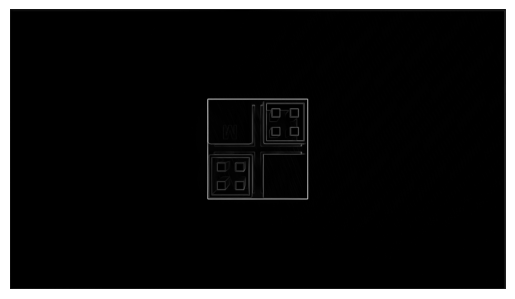

In [117]:
# Read the image
image = plt.imread('scene.png')

# Convert the image to grayscale
image = np.dot(image[...,:3], [0.299, 0.587, 0.114])

# Apply the sobel filters
image_x = convolve2d(image, sobel_x, stride=1, padding=1)
image_y = convimage_y = convolve2d(image, sobel_y, stride=1, padding=1)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(np.square(image_x) + np.square(image_y))

# Normalize the gradient magnitude
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()

# plt.imshow(image, cmap='gray')

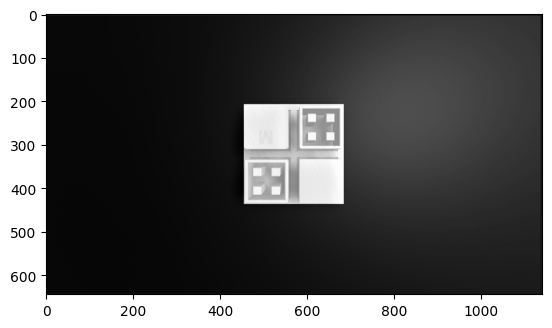

In [118]:
plt.imshow(image, cmap='gray')

In [51]:
# Template Matching
def template_matching(image, template):
    image = np.array(image)
    template = np.array(template)
    image_height, image_width = image.shape
    template_height, template_width = template.shape
    new_image = np.zeros((image_height - template_height, image_width - template_width))
    
    for y in range(image_height - template_height):
        for x in range(image_width - template_width):
            new_image[y][x] = np.sum(image[y:y + template_height, x:x + template_width] * template)
    return new_image


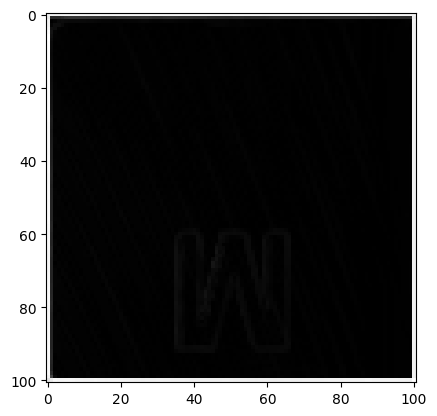

In [119]:
template = plt.imread('op2_template.png')
template = np.dot(template[...,:3], [0.299, 0.587, 0.114])

# Apply the sobel filters
template_x = convolve2d(template, sobel_x, stride=1, padding=1)
template_y = convolve2d(template, sobel_y, stride=1, padding=1)

# Compute the gradient magnitude
template_gradient_magnitude = np.sqrt(np.square(template_x) + np.square(template_y))

# Normalize the gradient magnitude
template_gradient_magnitude *= 255.0 / template_gradient_magnitude.max()

plt.imshow(template_gradient_magnitude, cmap='gray')

# plt.imshow(template, cmap='gray')

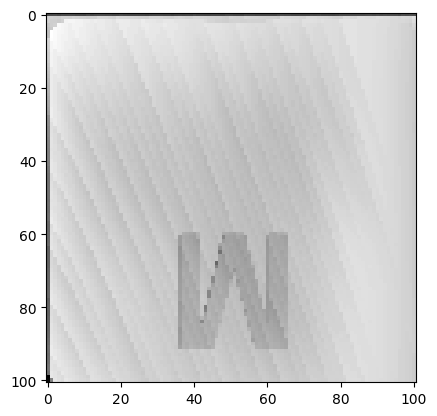

In [120]:
plt.imshow(template, cmap='gray')

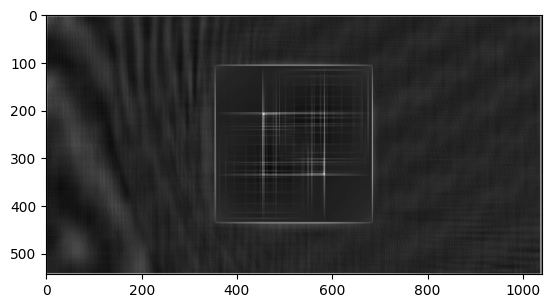

In [121]:
# Match the template

result = match_template(gradient_magnitude, template_gradient_magnitude)

plt.imshow(result, cmap='gray')

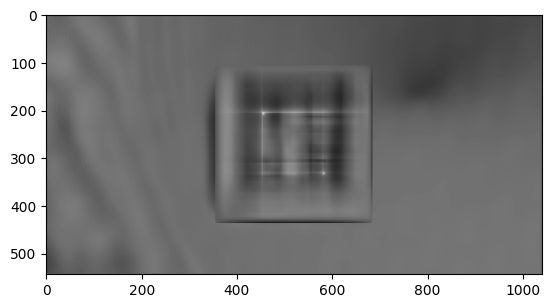

In [122]:
result_original = match_template(image, template)

plt.imshow(result_original, cmap='gray')

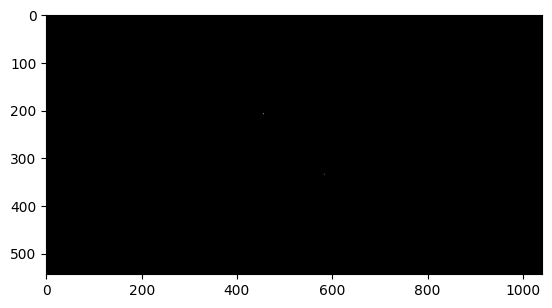

In [123]:
# normalize the result between 0 and 255
norm_result = (result - result.min()) / (result.max() - result.min()) * 255

# set a threshold to get the final result
threshold = 255 * .9
norm_result[norm_result > threshold] = 255
norm_result[norm_result <= threshold] = 0

plt.imshow(norm_result, cmap='gray')

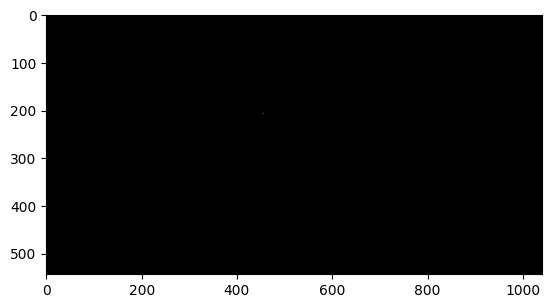

In [124]:
norm_result_original = (result_original - result_original.min()) / (result_original.max() - result_original.min()) * 255

threshold = 255 * .85
norm_result_original[norm_result_original > threshold] = 255
norm_result_original[norm_result_original <= threshold] = 0

plt.imshow(norm_result_original, cmap='gray')